<a href="https://colab.research.google.com/github/iam-nhi-nguyen/Massp2019/blob/master/analysis/pso_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)

### Number of shootout sequences

In [2]:
pso = pd.read_csv("./drive/MyDrive/data/final/pso.csv")
pso_outs = pso.groupby("game_id")["is_score"].apply(lambda x: tuple(map(int, x))).to_frame(name="outcomes")
pso_outs.shape

(4337, 1)

In [3]:
pso_outs.head()

,outcomes
game_id,
19YL_2014_2528464,"(1, 0, 1, 0, 1, 1, 0, 0)"
19YL_2014_2528466,"(0, 1, 1, 1, 0, 1, 0)"
19YL_2014_2528467,"(1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1)"
19YL_2014_2528470,"(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0)"
19YL_2014_2542063,"(0, 1, 1, 1, 1, 1, 1, 1, 1, 1)"


In [4]:
def team1win(out):
    s1 = 0
    s2 = 0
    for i in range(len(out)):
        if i % 2 == 0:
            s1 += out[i]
        else:
            s2 += out[i]
    return s1 > s2

pso_outs["team_1_win"] = list(map(team1win, pso_outs["outcomes"]))
pso_outs.head()

,outcomes,team_1_win
game_id,,
19YL_2014_2528464,"(1, 0, 1, 0, 1, 1, 0, 0)",True
19YL_2014_2528466,"(0, 1, 1, 1, 0, 1, 0)",False
19YL_2014_2528467,"(1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1)",False
19YL_2014_2528470,"(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0)",True
19YL_2014_2542063,"(0, 1, 1, 1, 1, 1, 1, 1, 1, 1)",False


In [5]:
games = pso_outs.index
competitions = list(map(lambda x: x.split("_")[0], games))
years = list(map(lambda x: int(x.split("_")[1]), games))

print(f"There are {len(set(competitions))} distinct competitions.")
print(f"There are {len(set(years))} distinct years/seasons")

There are 217 distinct competitions.
There are 64 distinct years/seasons


In [6]:
pso_counts = pd.DataFrame(0, index=["all_games"] + sorted(set(competitions)), columns=["all_seasons"] + sorted(set(years), reverse=True))
win1_pcts = pd.DataFrame(0, index=["all_games"] + sorted(set(competitions)), columns=["all_seasons"] + sorted(set(years), reverse=True))
for i in range(len(games)):
    pso_counts.loc[competitions[i], years[i]] += 1
    pso_counts.loc[competitions[i], "all_seasons"] += 1
    pso_counts.loc["all_games", years[i]] += 1
    pso_counts.loc["all_games", "all_seasons"] += 1
    if pso_outs["team_1_win"][i]:
        win1_pcts.loc[competitions[i], years[i]] += 1
        win1_pcts.loc[competitions[i], "all_seasons"] += 1
        win1_pcts.loc["all_games", years[i]] += 1
        win1_pcts.loc["all_games", "all_seasons"] += 1

for c in win1_pcts.index:
    for y in win1_pcts.columns:
        win1_pcts.loc[c,y] = round(win1_pcts.loc[c,y]/pso_counts.loc[c,y] * 100, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


In [7]:
pso_counts

,all_seasons,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960,1959,1958
all_games,4337,4,300,415,433,356,289,290,246,239,207,186,173,99,136,83,81,74,58,67,30,45,40,29,37,34,38,41,40,42,39,14,11,17,6,6,11,1,9,3,6,6,5,7,5,6,10,2,2,5,5,7,7,5,5,2,2,1,2,3,2,6,4,2,1
19YL,41,0,0,9,8,9,3,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2TP,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC00,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC04,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC06,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC10,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC12,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC13,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
win1_pcts

,all_seasons,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960,1959,1958
all_games,53.31,100.0,52.00,52.53,53.81,54.78,52.94,53.45,53.66,49.79,54.11,50.54,48.55,59.60,55.88,42.17,64.20,56.76,55.17,58.21,36.67,51.11,40.00,58.62,62.16,44.12,57.89,46.34,55.00,64.29,48.72,42.86,36.36,58.82,83.33,50.0,45.45,0.0,66.67,66.67,33.33,100.0,20.0,71.43,40.0,50.00,70.00,100.0,100.0,60.0,40.0,100.0,42.86,60.0,80.0,0.0,50.0,100.0,50.0,66.67,50.0,66.67,100.0,0.0,100.0
19YL,60.98,NaN,NaN,44.44,75.00,77.78,66.67,57.14,40.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2TP,33.33,NaN,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC02,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC04,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC06,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC10,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC12,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC13,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


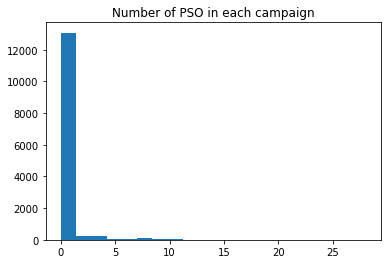

In [9]:
plt.hist(pso_counts.iloc[1:,1:].values.flatten(), bins=20)
plt.title("Number of PSO in each campaign");

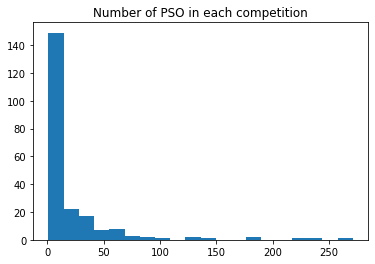

In [10]:
plt.hist(pso_counts.iloc[1:,0].values.flatten(), bins=20)
plt.title("Number of PSO in each competition");

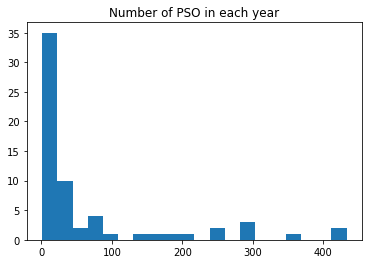

In [11]:
plt.hist(pso_counts.iloc[0,1:].values.flatten(), bins=20)
plt.title("Number of PSO in each year");

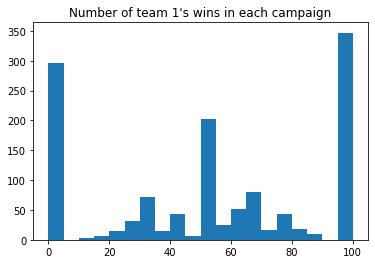

In [12]:
plt.hist(win1_pcts.iloc[1:,1:].values.flatten(), bins=20)
plt.title("Number of team 1's wins in each campaign");

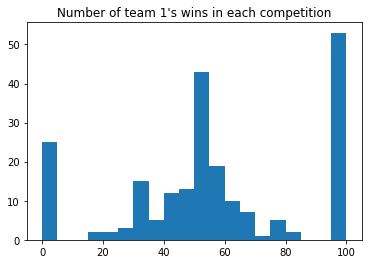

In [13]:
plt.hist(win1_pcts.iloc[1:,0].values.flatten(), bins=20)
plt.title("Number of team 1's wins in each competition");

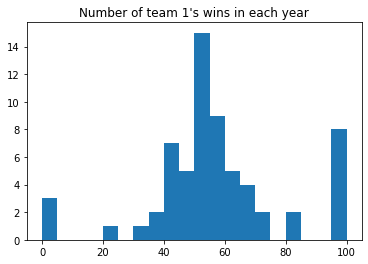

In [14]:
plt.hist(win1_pcts.iloc[0,1:].values.flatten(), bins=20)
plt.title("Number of team 1's wins in each year");